In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importing the dataset
wine = pd.read_csv('winequality.csv')

wine.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Data Cleaning
# Check for missing values
print(wine.isnull().sum())

# Fill missing values with mean or median
wine.fillna(wine.mean(), inplace=True)

# Check the data types of each column
print(wine.dtypes)


# Display the cleaned dataset
print(wine.head())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         

In [3]:

# Making binary classification for the response variable
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

# Assigning and dividing the dataset
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)



<Axes: title={'center': 'Correlation with quality'}>

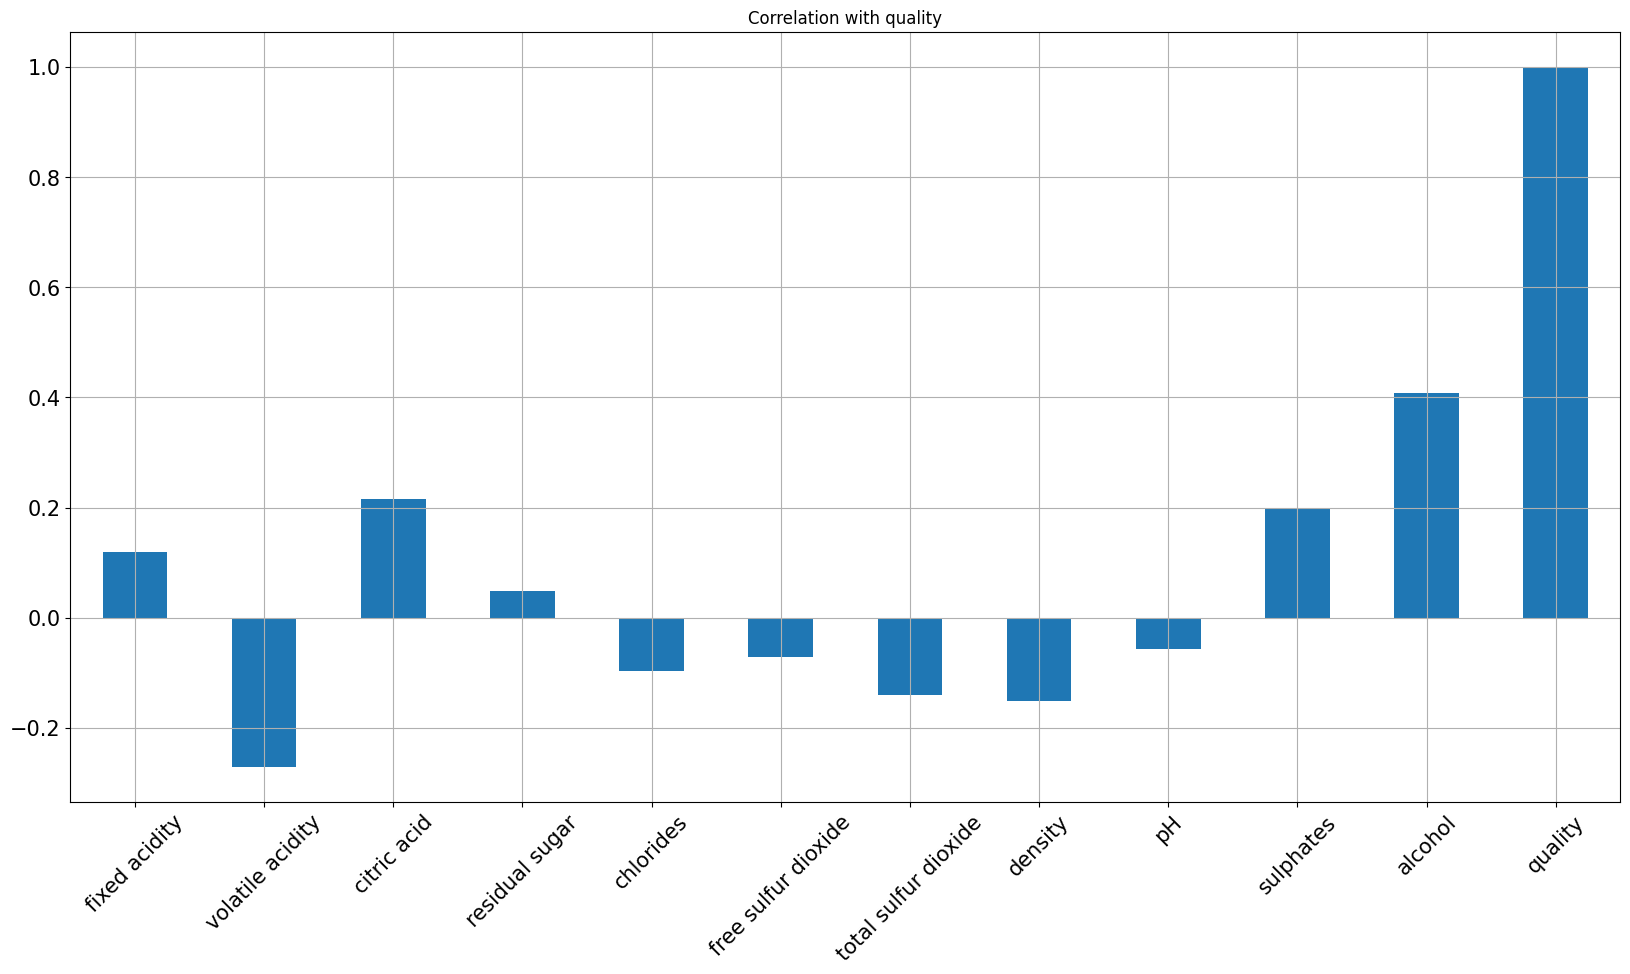

In [4]:
#Correlation with Quality with respect to attributes
wine.corrwith(wine.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [7]:

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using Principal Component Analysis (PCA)
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


# SVM (RBF Kernel) with Hyperparameter Tuning
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(), svm_params)
grid_svm.fit(X_train, y_train)
svm = grid_svm.best_estimator_

# Random Forest with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'criterion': ['entropy', 'gini']}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)
rf = grid_rf.best_estimator_

# Model Evaluation
models = {'SVM (RBF)': svm, 'Random Forest': rf}
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results = results.append({'Model': model_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1},
                             ignore_index=True)

# Displaying the results
print(results)

           Model  Accuracy  Precision    Recall  F1 Score
0      SVM (RBF)  0.878125   0.733333  0.239130  0.360656
1  Random Forest  0.890625   0.677419  0.456522  0.545455


<ipython-input-7-11c7e9d70b8c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1},
<ipython-input-7-11c7e9d70b8c>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1},
